In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [230]:
df = pd.read_csv('haberman.csv', names = ['Age', 'Year Of Operation', 'Axillary Nodes', 'Survival Status'])

In [231]:
df

,Age,Year Of Operation,Axillary Nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [232]:
df['Survival Status'].unique()

array([1, 2])

In [233]:
df.head()

,Age,Year Of Operation,Axillary Nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [234]:
df.tail()

,Age,Year Of Operation,Axillary Nodes,Survival Status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [235]:
df.shape

(306, 4)

In [236]:
df.shape[0]

306

In [237]:
df.shape[1]

4

In [238]:
df.isnull().sum()

Age                  0
Year Of Operation    0
Axillary Nodes       0
Survival Status      0
dtype: int64

In [239]:
df.duplicated().sum()

np.int64(17)

In [240]:
df.columns

Index(['Age', 'Year Of Operation', 'Axillary Nodes', 'Survival Status'], dtype='object')

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                306 non-null    int64
 1   Year Of Operation  306 non-null    int64
 2   Axillary Nodes     306 non-null    int64
 3   Survival Status    306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [242]:
#Univariate

In [243]:
df['Age']

0      30
1      30
2      30
3      31
4      31
       ..
301    75
302    76
303    77
304    78
305    83
Name: Age, Length: 306, dtype: int64

C:\Users\khair\AppData\Local\Temp\ipykernel_20396\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

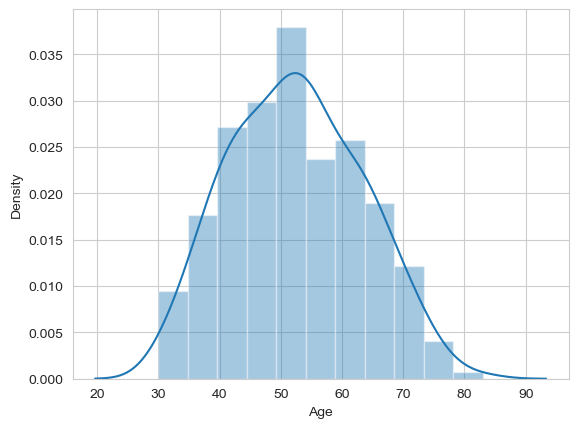

In [244]:
sns.distplot(df['Age'])

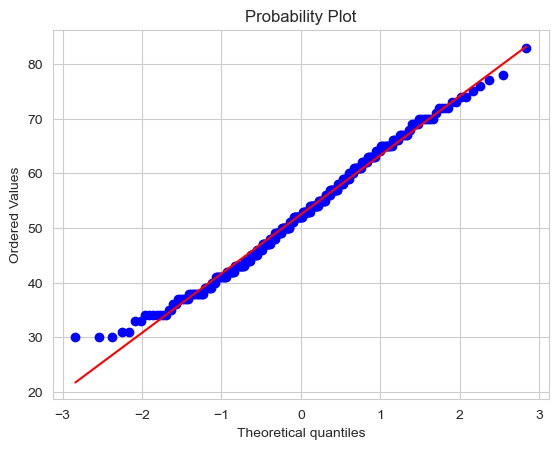

In [245]:
#looks like almost gaussian distribution
stats.probplot(df['Age'], dist = 'norm', plot = plt)
plt.show()

In [246]:
from scipy.stats import skew, kurtosis

In [247]:
skewness = skew(df['Age'])

In [248]:
skewness

np.float64(0.1457859143161024)

In [249]:
from scipy.stats import kurtosis

In [250]:
kur = kurtosis(df['Age'])

In [251]:
kur

np.float64(-0.5993503663451287)

In [252]:
data = df['Age']

In [253]:
#CDF
sorted_data = np.sort(data)
cdf_values = np.arange(1, len(sorted_data)+1) / len(sorted_data)

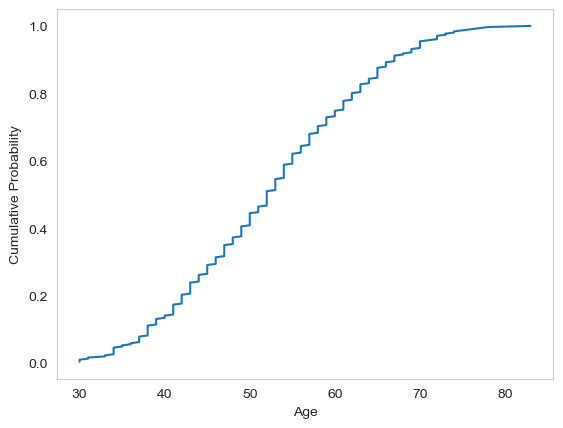

In [254]:
# 40% people is less than or equal the 50 age
# 60% people is greater than 50 ageplt.title('CDF for Age')
plt.xlabel('Age')
plt.ylabel('Cumulative Probability')
plt.grid()
plt.plot(sorted_data, cdf_values)
plt.show() 

<Axes: ylabel='Age'>

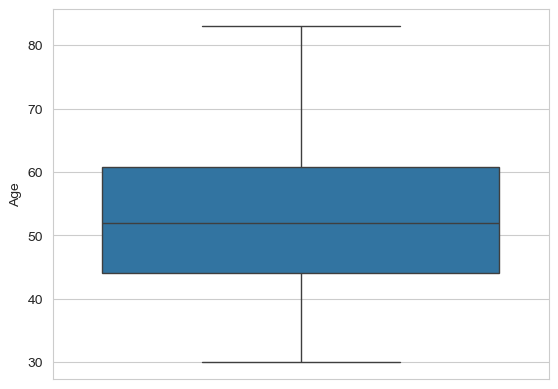

In [255]:
#there is no outliers present in this column
#minvalues = 30
#maxvalues = 80
#50% data is lies between 45 - 60 age
sns.boxplot(data) 

In [256]:
np.mean(data)

np.float64(52.45751633986928)

In [257]:
np.median(data)

np.float64(52.0)

In [258]:
np.std(data)

10.78578520363183

In [259]:
np.var(data)

116.33316245888332

In [260]:
# 95% data is less than the 70%
np.percentile(data, 95)

np.float64(70.0)

In [261]:
df.columns

Index(['Age', 'Year Of Operation', 'Axillary Nodes', 'Survival Status'], dtype='object')

In [262]:
df['Year Of Operation'].value_counts()

Year Of Operation
58    36
64    31
63    30
65    28
66    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: count, dtype: int64

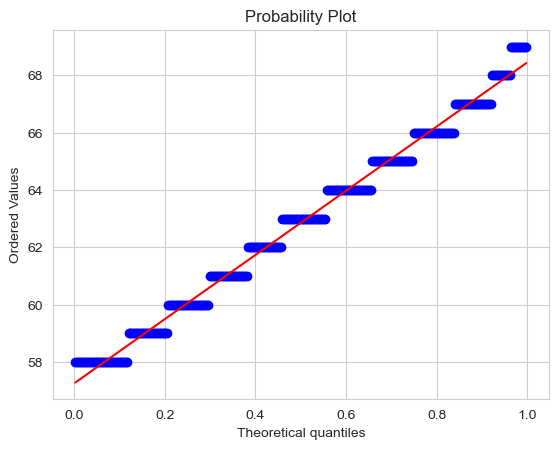

In [263]:
stats.probplot(df['Year Of Operation'], dist = 'uniform', plot = plt)
plt.show() 

In [264]:
df.columns

Index(['Age', 'Year Of Operation', 'Axillary Nodes', 'Survival Status'], dtype='object')

In [265]:
data = df['Axillary Nodes']

C:\Users\khair\AppData\Local\Temp\ipykernel_20396\1851847670.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


<Axes: xlabel='Axillary Nodes', ylabel='Density'>

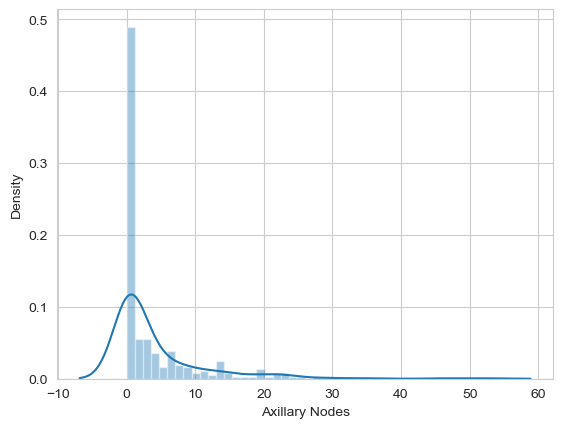

In [266]:
sns.distplot(data)

In [267]:
log = np.log(data)

C:\Users\khair\jupyter\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\khair\jupyter\Lib\site-packages\numpy\lib\_function_base_impl.py:2842: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


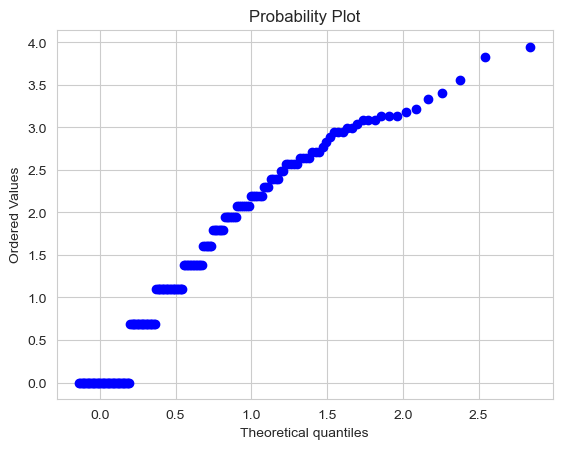

In [268]:
stats.probplot(log, dist = 'norm', plot = plt)
plt.show()

<Axes: ylabel='Axillary Nodes'>

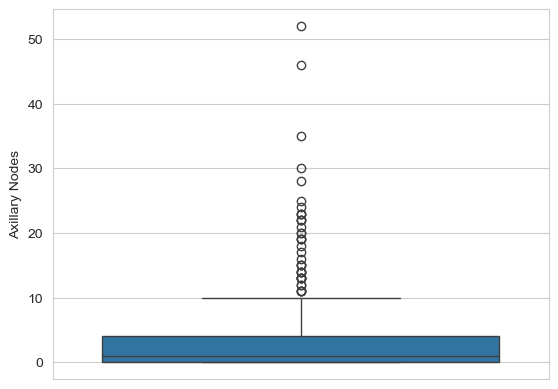

In [269]:
# maximum data points have the larger values
# there is a lots of outliers present in the Axillary Nodes
sns.boxplot(data)

In [270]:
np.mean(data)

np.float64(4.026143790849673)

In [271]:
np.median(data)

np.float64(1.0)

In [272]:
np.std(data)

7.177896092811152

In [273]:
np.percentile(data, 90)

np.float64(13.0)

In [274]:
np.var(data) 

51.52219231919361

In [275]:
df.columns

Index(['Age', 'Year Of Operation', 'Axillary Nodes', 'Survival Status'], dtype='object')

In [276]:
df['Survival Status'] = df['Survival Status'].apply(lambda x : 'Survived' if x == 1 else 'Unsurvived')

In [277]:
df['Survival Status']

0        Survived
1        Survived
2        Survived
3        Survived
4        Survived
          ...    
301      Survived
302      Survived
303      Survived
304    Unsurvived
305    Unsurvived
Name: Survival Status, Length: 306, dtype: object

In [278]:
df['Survival Status'].unique()

array(['Survived', 'Unsurvived'], dtype=object)

In [279]:
df['Survival Status'].value_counts()

Survival Status
Survived      225
Unsurvived     81
Name: count, dtype: int64

<Axes: xlabel='Survival Status'>

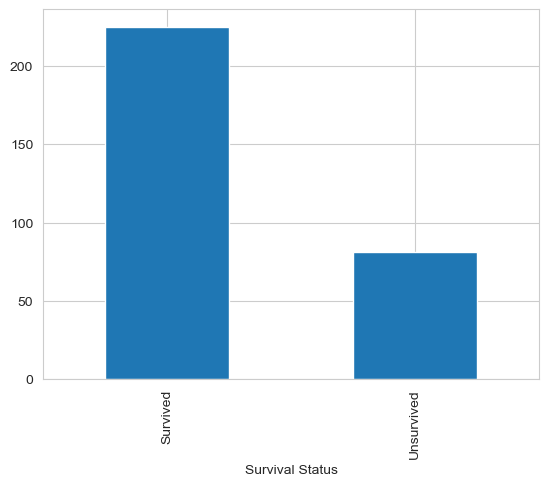

In [280]:
df['Survival Status'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Survival Status', ylabel='count'>

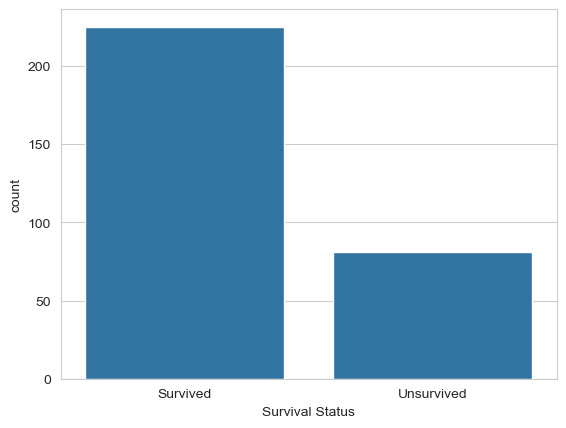

In [281]:
sns.countplot(x = 'Survival Status', data = df)

<Axes: xlabel='count', ylabel='Survival Status'>

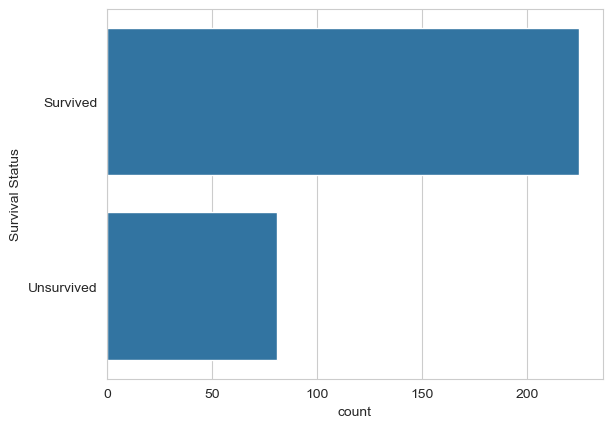

In [282]:
sns.countplot(df['Survival Status'])

In [283]:
#bivariate

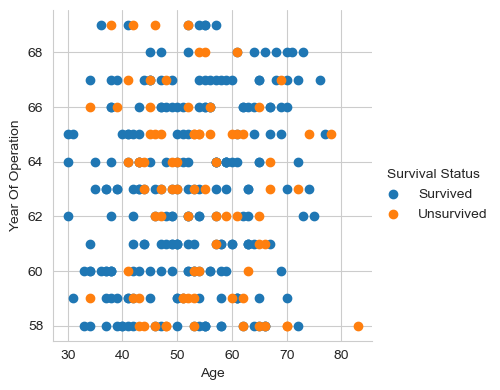

In [284]:
# there is a overlapping of age and year of operation columns so thats we can't seperate survival status group
# there is no strong relation between these 2 features
# there is a strong survival status when year of operation <= 65 & age <= 40
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Survival Status', height = 4).map(plt.scatter, 'Age', 'Year Of Operation').add_legend()
plt.show()

In [285]:
stats.spearmanr(df['Age'], df['Year Of Operation'])

SignificanceResult(statistic=np.float64(0.09106894802767489), pvalue=np.float64(0.11187056184161104))

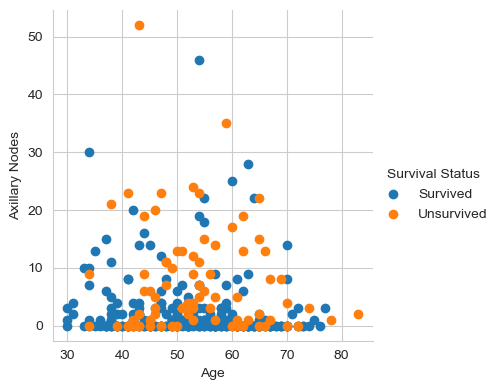

In [286]:
# if the auxillary nodes is increases the patients are dying within the 5 yrs 
# if these 2 feature are not able to seperate this 2 group seperated
# if the age is less and auxillary nodes are also less then there is increase of survival rates
# if the age is greater than 78 then and whatever the auxillary nodes is there then there is a unsurvuved person
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Survival Status', height = 4).map(plt.scatter, 'Age', 'Axillary Nodes').add_legend()
plt.show()

In [287]:
df.columns 

Index(['Age', 'Year Of Operation', 'Axillary Nodes', 'Survival Status'], dtype='object')

In [288]:
stats.spearmanr(df['Age'], df['Axillary Nodes'])

SignificanceResult(statistic=np.float64(-0.09769054256880608), pvalue=np.float64(0.08801266309750018))

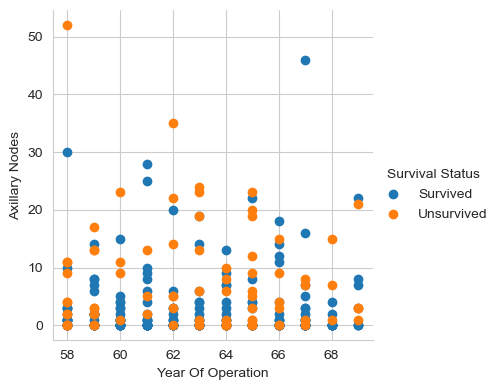

In [289]:
# there is no strong relation completely overlapping
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Survival Status', height = 4).map(plt.scatter, 'Year Of Operation', 'Axillary Nodes').add_legend()
plt.show() 

In [290]:
stats.spearmanr(df['Axillary Nodes'], df['Year Of Operation'])

SignificanceResult(statistic=np.float64(-0.03614591574703722), pvalue=np.float64(0.5287512472067344))

In [291]:
df['Year Of Operation'].value_counts()

Year Of Operation
58    36
64    31
63    30
65    28
66    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: count, dtype: int64

In [292]:
data = df['Year Of Operation']

In [293]:
# CLT
sample_means = []
def apply_clt(data, size_of_sample, no_of_samples):
    for i in range(0, no_of_samples):
        sample = np.random.choice(data, size = size_of_sample, replace = True)
        sample_means.append(np.mean(sample))
size_of_sample = 30
no_of_samples = 1000
data =  df['Axillary Nodes'][df['Survival Status'] == "Survived"]
apply_clt(data, size_of_sample, no_of_samples)

In [294]:
# Axillary Nodes for Survived 2.7572666666666663
np.mean(sample_means)

np.float64(2.828766666666666)

In [295]:
sample_means = []
def apply_clt(data, size_of_sample, no_of_samples):
    for i in range(0, no_of_samples):
        sample = np.random.choice(data, size = size_of_sample, replace = True)
        sample_means.append(np.mean(sample))
size_of_sample = 30
no_of_samples = 1000
data =  df['Axillary Nodes'][df['Survival Status'] == "Unsurvived"]
apply_clt(data, size_of_sample, no_of_samples)

In [296]:
# Axillary Nodes for Unsurvived 7.461266666666666
np.mean(sample_means)

np.float64(7.425466666666666)

In [297]:
# CLT
sample_means = []
def apply_clt(data, size_of_sample, no_of_samples):
    for i in range(0, no_of_samples):
        sample = np.random.choice(data, size = size_of_sample, replace = True)
        sample_means.append(np.mean(sample))
size_of_sample = 30
no_of_samples = 1000
data =  df['Age'][df['Survival Status'] == "Survived"]
apply_clt(data, size_of_sample, no_of_samples)


In [298]:
# Age_for_survived 51.93016666666667
np.mean(sample_means)

np.float64(52.04456666666667)

In [299]:
# CLT
sample_means = []
def apply_clt(data, size_of_sample, no_of_samples):
    for i in range(0, no_of_samples):
        sample = np.random.choice(data, size = size_of_sample, replace = True)
        sample_means.append(np.mean(sample))
size_of_sample = 30
no_of_samples = 1000
data =  df['Age'][df['Survival Status'] == "Unsurvived"]
apply_clt(data, size_of_sample, no_of_samples)


In [300]:
#Age_for_Unsurvived 53.5835
np.mean(sample_means)

np.float64(53.6122)

<Axes: xlabel='Survival Status'>

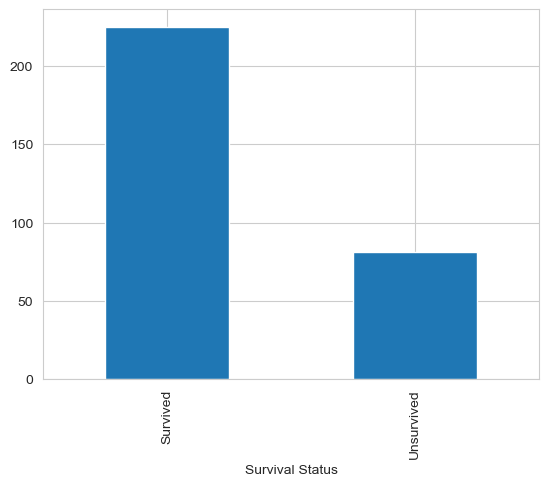

In [301]:
df['Survival Status'].value_counts().plot(kind = 'bar')

In [302]:
#Multivariate

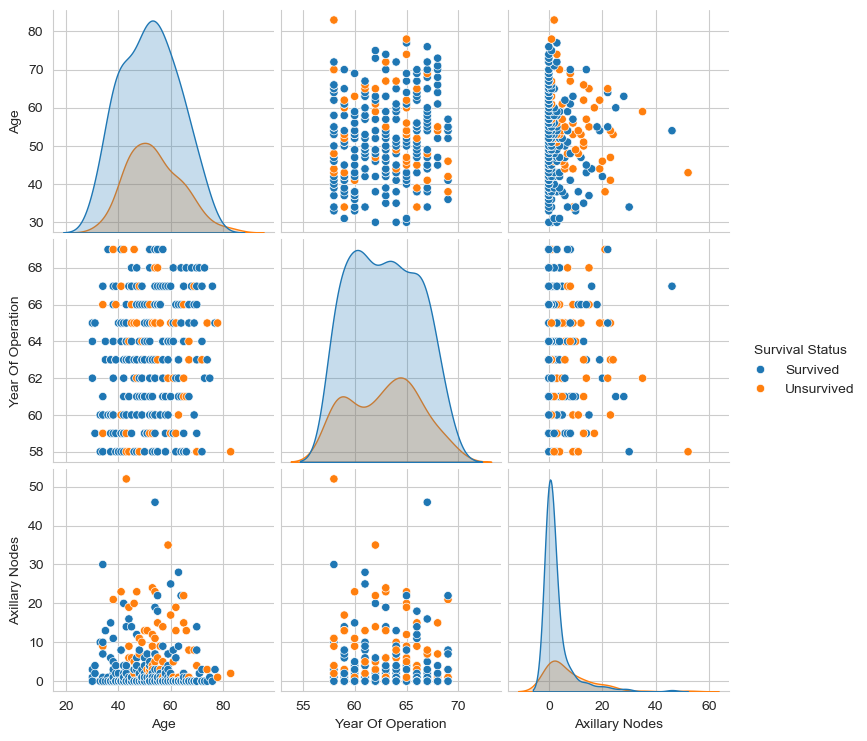

In [303]:
sns.pairplot(df, hue = 'Survival Status')
plt.show()

In [304]:
def category(x):
    if 'Survived' == x:
        return 1
    return 2

In [305]:
df['new_survival_status'] = df['Survival Status'].apply(category)

In [306]:
df

,Age,Year Of Operation,Axillary Nodes,Survival Status,new_survival_status
0,30,64,1,Survived,1
1,30,62,3,Survived,1
2,30,65,0,Survived,1
3,31,59,2,Survived,1
4,31,65,4,Survived,1
...,...,...,...,...,...
301,75,62,1,Survived,1
302,76,67,0,Survived,1
303,77,65,3,Survived,1
304,78,65,1,Unsurvived,2


In [307]:
df.drop(columns = ['Survival Status'], inplace = True)

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  306 non-null    int64
 1   Year Of Operation    306 non-null    int64
 2   Axillary Nodes       306 non-null    int64
 3   new_survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [309]:
df['new_survival_status'].unique()

array([1, 2])

<Axes: >

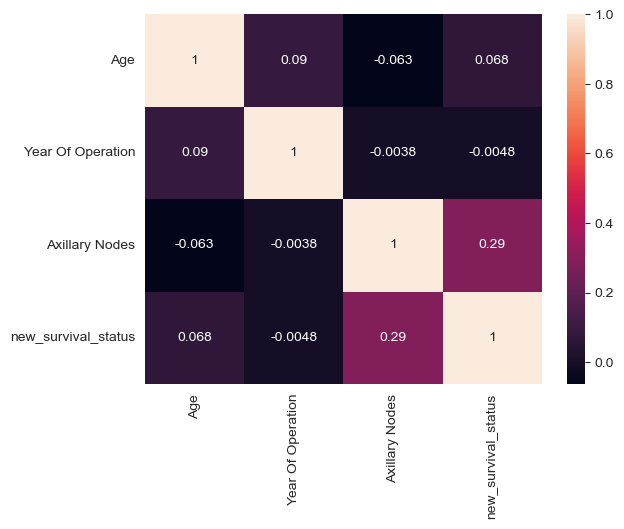

In [310]:
sns.heatmap(df.corr(), annot = True)

Index(['Age', 'Year Of Operation', 'Axillary Nodes', 'new_survival_status'], dtype='object')